# Order Food Analysis
## Author: Eren ERİS

In [13]:
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

from sklearn.model_selection import train_test_split;
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

from sklearn.naive_bayes import GaussianNB , BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 088F-1ED4

 Directory of C:\Users\EREN\Documents\YapayZeka\GitHub\21Project\Order Food Analysis

01/04/2024  08:17 PM    <DIR>          .
01/04/2024  08:17 PM    <DIR>          ..
01/04/2024  08:17 PM    <DIR>          .ipynb_checkpoints
12/15/2023  05:44 PM            35,806 onlinefoods.csv
01/04/2024  08:17 PM                72 Untitled.ipynb
               2 File(s)         35,878 bytes
               3 Dir(s)  61,052,653,568 bytes free


In [3]:
df = pd.read_csv("onlinefoods.csv")

In [4]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [7]:
df.isnull().sum() # Bos Verileri Listele

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

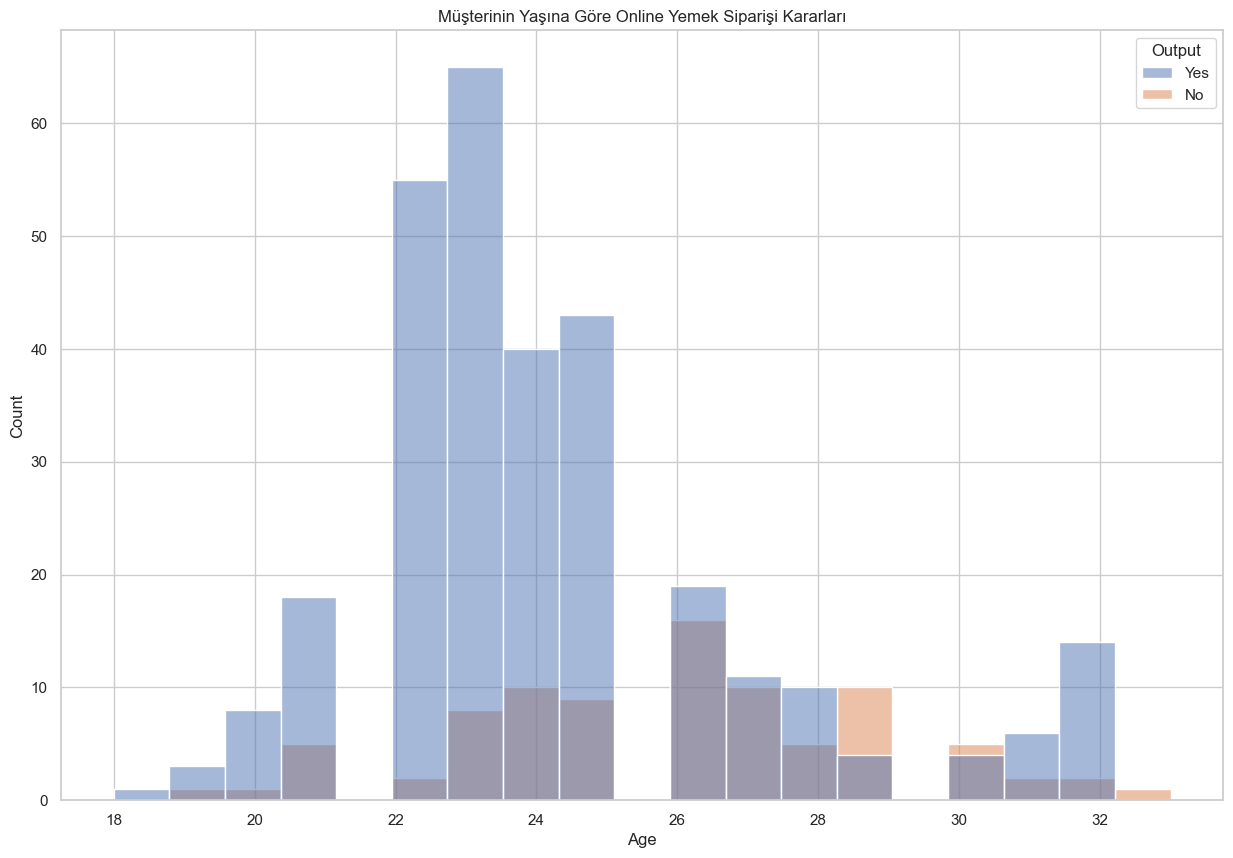

In [11]:
plt.figure(figsize=(15, 10))
plt.title("Müşterinin Yaşına Göre Online Yemek Siparişi Kararları")
sns.histplot(x="Age", hue="Output", data=df)
plt.show()

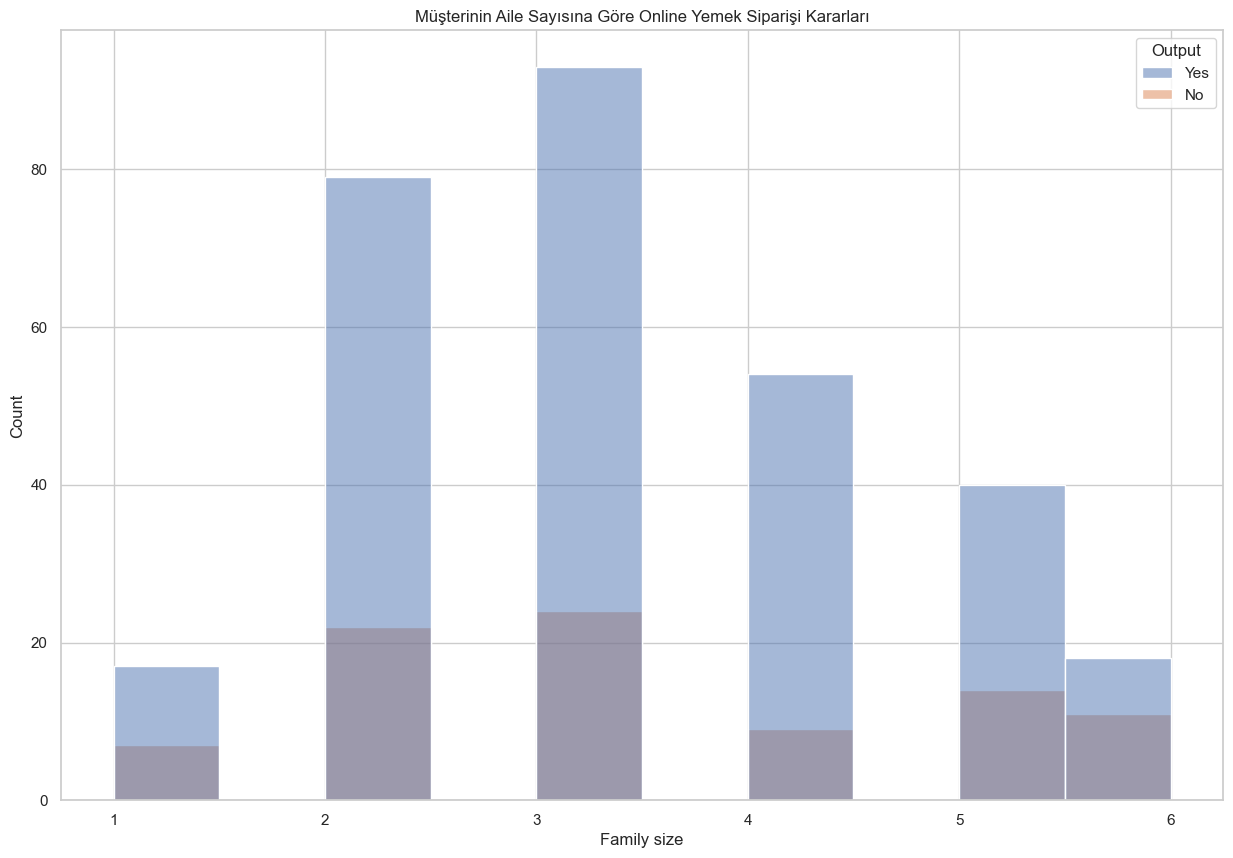

In [12]:
plt.figure(figsize=(15, 10))
plt.title("Müşterinin Aile Sayısına Göre Online Yemek Siparişi Kararları")
sns.histplot(x="Family size", hue="Output", data=df)
plt.show()

In [14]:
def getModel(model , x_train , y_train , x_test , y_test):
    mod = model.fit(x_train , y_train)
    predict = model.predict(x_test)
    print("------------Accury Score------------")
    print(accuracy_score(predict,y_test))
    print("------------Classification Report------------")
    print(classification_report(predict,y_test))
    sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='.2f',cmap="crest")

In [19]:
#splitting data
from sklearn.model_selection import train_test_split
x = df[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]]
y = df[["Output"]]
x=pd.get_dummies(x,drop_first=True)
y=pd.get_dummies(y,drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------------Accury Score------------
0.7692307692307693
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.58      0.35      0.44        20
           1       0.80      0.91      0.85        58

    accuracy                           0.77        78
   macro avg       0.69      0.63      0.65        78
weighted avg       0.75      0.77      0.75        78



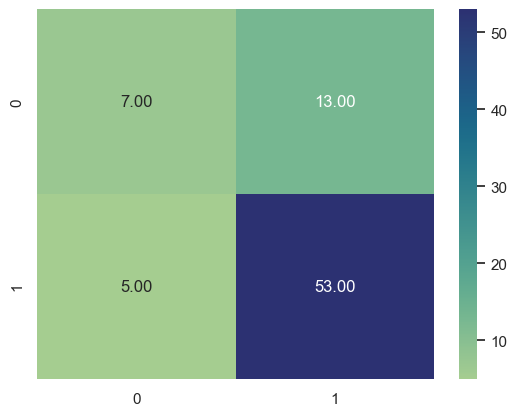

In [20]:
getModel(GaussianNB() , x_train , y_train , x_test , y_test)

D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------------Accury Score------------
0.8717948717948718
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.92      0.92      0.92        66

    accuracy                           0.87        78
   macro avg       0.75      0.75      0.75        78
weighted avg       0.87      0.87      0.87        78



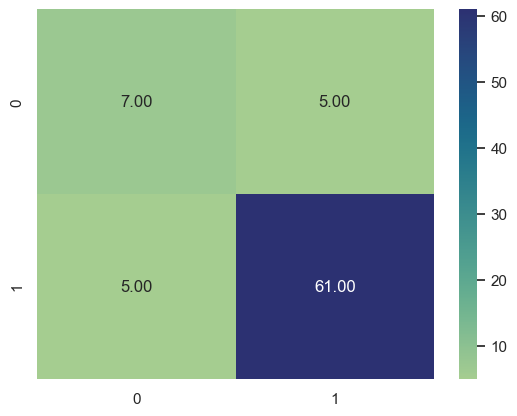

In [21]:
getModel(BernoulliNB(), x_train , y_train , x_test , y_test)

D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


------------Accury Score------------
0.8717948717948718
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.95      0.90      0.93        70

    accuracy                           0.87        78
   macro avg       0.69      0.76      0.71        78
weighted avg       0.90      0.87      0.88        78



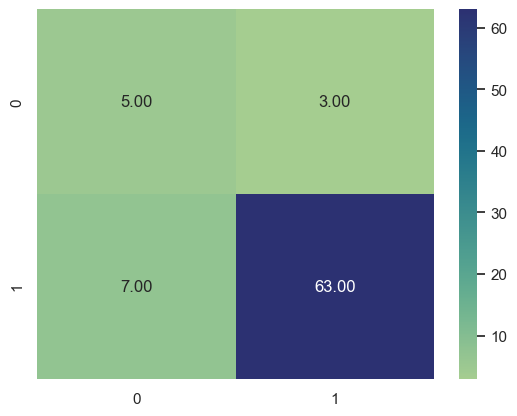

In [22]:
getModel(KNeighborsClassifier(), x_train , y_train , x_test , y_test)

D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\metrics\_classification.p

------------Accury Score------------
0.8461538461538461
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.85      0.92        78

    accuracy                           0.85        78
   macro avg       0.50      0.42      0.46        78
weighted avg       1.00      0.85      0.92        78



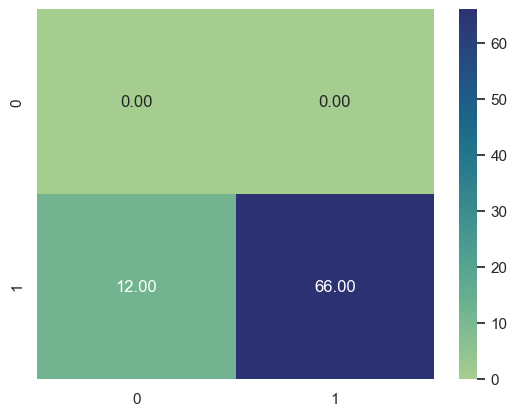

In [23]:
getModel( LogisticRegression(), x_train , y_train , x_test , y_test)

------------Accury Score------------
0.8333333333333334
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.75      0.47      0.58        19
           1       0.85      0.95      0.90        59

    accuracy                           0.83        78
   macro avg       0.80      0.71      0.74        78
weighted avg       0.82      0.83      0.82        78



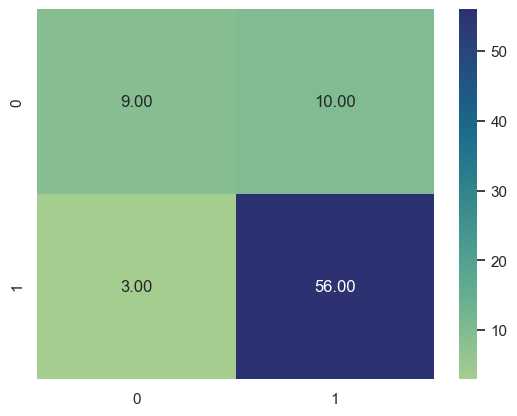

In [24]:
getModel( DecisionTreeClassifier(), x_train , y_train , x_test , y_test)

C:\Users\EREN\AppData\Local\Temp\ipykernel_24508\1730650395.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod = model.fit(x_train , y_train)


------------Accury Score------------
0.9102564102564102
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.95      0.94      0.95        67

    accuracy                           0.91        78
   macro avg       0.81      0.83      0.82        78
weighted avg       0.91      0.91      0.91        78



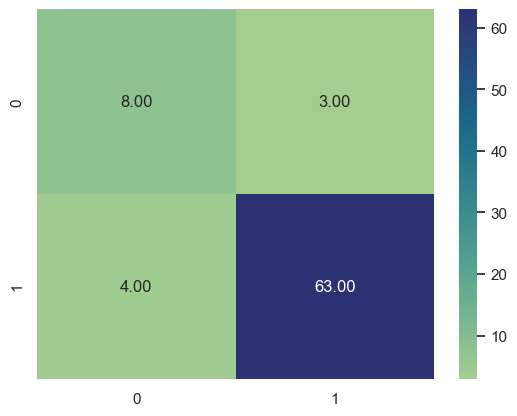

In [25]:
getModel( RandomForestClassifier(), x_train , y_train , x_test , y_test)